Onda cuadrada

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio  

def square_wave(x):
    return np.where((x % (2 * np.pi)) < np.pi, 1, -1)

def fourier_series_approx(x, N):
    approximation = np.zeros_like(x)
    for k in range(1, N+1):
        approximation += (4 / (np.pi * (2*k - 1))) * np.sin((2*k - 1) * x)
    return approximation

x = np.linspace(-2 * np.pi, 2 * np.pi, 1000)

filenames = []

for N in [1, 3, 10, 30, 100]:
    plt.figure(figsize=(10, 6))
    plt.plot(x, square_wave(x), label='Onda cuadrada', color='black', linewidth=2)

    plt.plot(x, fourier_series_approx(x, N), label=f'N = {N}')

    plt.title(f'Serie de Fourier para una onda cuadrada (N = {N})')
    plt.xlabel('x')
    plt.ylabel('')
    plt.ylim(-1.5, 1.5)
    plt.legend()
    plt.grid(True)

    filename = f'frame_{N}.png'
    plt.savefig(filename)
    filenames.append(filename)
    plt.close()

with imageio.get_writer('fourier_series_approx.gif', mode='I', duration=1000) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

import os
for filename in filenames:
    os.remove(filename)

Mounstro de Weierstrass $\sum a^n  cos(b^n \pi x)$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio
import os

def weierstrass_function(x, a, b, N):
    return sum(a**n * np.cos(float(b)**n * np.pi * x) for n in range(min(N, 100)))

a = 0.5
b = 3
N_values = [1, 3, 10, 30]

x = np.linspace(-2, 2, 10000)
filenames = []

for N in N_values:
    plt.figure(figsize=(10, 6))
    plt.plot(x, weierstrass_function(x, a, b, N), label=f'N = {N}', color='black', linewidth=0.7)
    plt.title(f'Mounstro de Weierstrass $\sum a^n  cos(b^n \pi x)$ (N = {N})')
    plt.xlabel('x')
    plt.ylabel('W(x)')
    plt.ylim(-2, 2)
    plt.legend()
    plt.grid(True)
    
    filename = f'weierstrass_{N}.png'
    plt.savefig(filename, dpi=300)
    filenames.append(filename)
    plt.close()

with imageio.get_writer('weierstrass_function.gif', mode='I', duration=2000) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

for filename in filenames:
    os.remove(filename)


<>:19: SyntaxWarning: invalid escape sequence '\s'
<>:19: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Grego\AppData\Local\Temp\ipykernel_22800\2655536089.py:19: SyntaxWarning: invalid escape sequence '\s'
  plt.title(f'Mounstro de Weierstrass $\sum a^n  cos(b^n \pi x)$ (N = {N})')


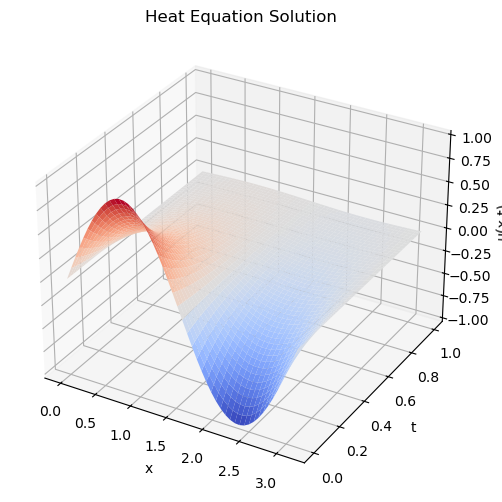

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

D = 1  
L = np.pi  
T_max = 1  
Nx = 50  
Nt = 200  

x = np.linspace(0, L, Nx)
t = np.linspace(0, T_max, Nt)
X, T = np.meshgrid(x, t)

def g(x):
    return np.sin(2*x)  

def bn(n):
    integrand = lambda x: g(x) * np.sin(n * np.pi * x / L)
    return (2 / L) * quad(integrand, 0, L)[0]

def heat_solution(X, T, terms=50):
    u = np.zeros_like(X)
    for n in range(1, terms + 1):
        Bn = bn(n)
        u += Bn * np.sin(n * np.pi * X / L) * np.exp(-D * (n * np.pi / L)**2 * T)
    return u

U = heat_solution(X, T, terms=20)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, T, U, cmap='coolwarm')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x,t)')
ax.set_title('Heat Equation Solution')
plt.savefig("heat_equation_plot.png", dpi=300)
plt.show()


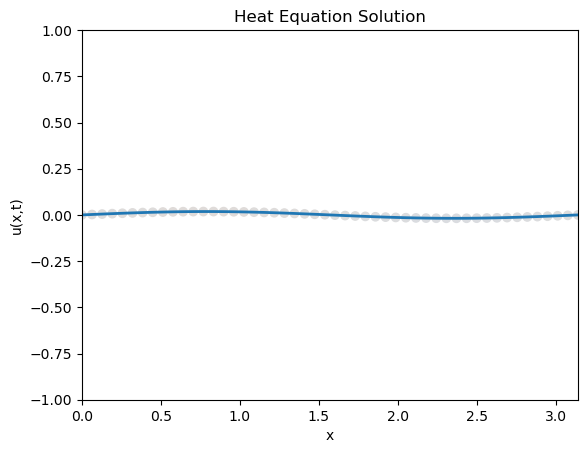

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.integrate import quad

D = 1  
L = np.pi  
T_max = 1  
Nx = 50  
Nt = 200  

x = np.linspace(0, L, Nx)
t = np.linspace(0, T_max, Nt)
X, T = np.meshgrid(x, t)

def g(x):
    return np.sin(2*x)  

def bn(n):
    integrand = lambda x: g(x) * np.sin(n * np.pi * x / L)
    return (2 / L) * quad(integrand, 0, L)[0]

def heat_solution(x, t, terms=50):
    u = np.zeros_like(x)
    for n in range(1, terms + 1):
        Bn = bn(n)
        u += Bn * np.sin(n * np.pi * x / L) * np.exp(-D * (n * np.pi / L)**2 * t)
    return u

fig, ax = plt.subplots()
ax.set_xlim(0, L)
ax.set_ylim(-1, 1)
ax.set_xlabel('x')
ax.set_ylabel('u(x,t)')
ax.set_title('Heat Equation Solution')
line, = ax.plot([], [], lw=2)
sc = ax.scatter([], [], c=[], cmap='coolwarm', vmin=-1, vmax=1)

def init():
    line.set_data([], [])
    sc.set_offsets(np.zeros((Nx, 2)))
    sc.set_array(np.zeros(Nx))
    return line, sc

def update(frame):
    u = heat_solution(x, t[frame], terms=20)
    line.set_data(x, u)
    sc.set_offsets(np.c_[x, u])
    sc.set_array(u)
    return line, sc

ani = animation.FuncAnimation(fig, update, frames=Nt, init_func=init, blit=True)
ani.save("heat_equation.gif", writer="pillow", fps=30)
plt.show()


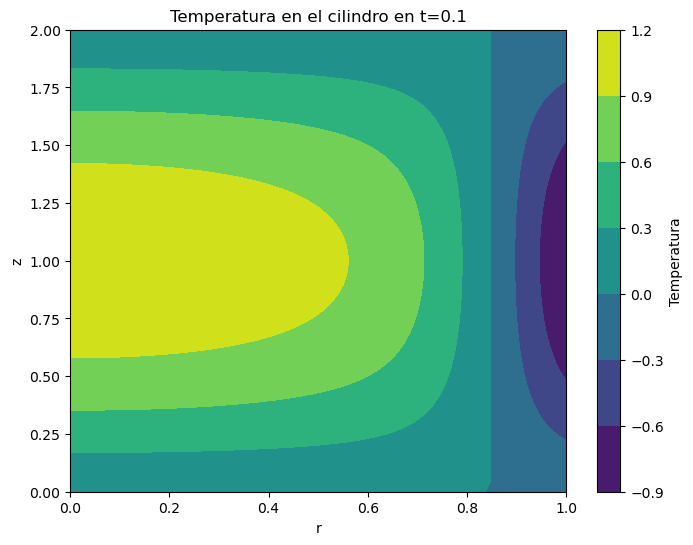

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import j0  # Bessel function of order zero

# Parámetros del cilindro y del problema
a = 1.0  # Radio del cilindro
b = 2.0  # Altura del cilindro
D = 0.1  # Coeficiente de difusión

# Condición inicial simple: temperatura uniforme
def initial_temperature(r, z):
    return np.sin(np.pi * z / b)

# Número de términos en la serie
m_max = 10
n_max = 10

# Función para calcular los coeficientes c_mn
def coefficient_c_mn(m, n):
    s_n = n * np.pi / a  # Raíces del Bessel de orden cero
    integral = 0
    # Integrando numéricamente sobre el volumen del cilindro
    dr = a / 100
    dz = b / 100
    for r in np.arange(0, a, dr):
        for z in np.arange(0, b, dz):
            integral += r * initial_temperature(r, z) * np.sin(m * np.pi * z / b) * j0(s_n * r) * dr * dz
    return (4 / (b * a**2 * j0(s_n)**2)) * integral

# Función para calcular la temperatura en el tiempo t
def temperature(r, z, t):
    sum_series = 0
    for m in range(1, m_max + 1):
        for n in range(1, n_max + 1):
            s_n = n * np.pi / a
            lambda_mn = -D * (s_n**2 + (m * np.pi / b)**2)  # Autovalores del problema
            c_mn = coefficient_c_mn(m, n)
            sum_series += c_mn * np.sin(m * np.pi * z / b) * j0(s_n * r) * np.exp(lambda_mn * t)
    return sum_series

# Visualización del perfil de temperatura en un tiempo fijo
time = 0.1  # Tiempo en el que evaluaremos la temperatura
r_values = np.linspace(0, a, 50)
z_values = np.linspace(0, b, 50)
R, Z = np.meshgrid(r_values, z_values)
T = temperature(R, Z, time)

plt.figure(figsize=(8, 6))
plt.contourf(R, Z, T, cmap='viridis')
plt.colorbar(label='Temperatura')
plt.xlabel('r')
plt.ylabel('z')
plt.title(f'Temperatura en el cilindro en t={time}')
plt.show()
